In [1]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
# Загрузка изображения
image = cv2.imread("bucket.jpg")

In [ ]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# Конвертирование в оттенки серого
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
plt.imshow(gray, cmap='gray')
plt.show()

In [ ]:
image = cv2.imread("bucket.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()
# Применение фильтра Гаусса для уменьшения шумов
blur = cv2.GaussianBlur(gray, (5,5), 0)

# Детектор границ Кенни
canny = cv2.Canny(blur, 50, 150)

# Поиск контуров на изображении
contours, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Отбор наиболее вероятного контура для ручки
max_contour = max(contours, key=cv2.contourArea)

# Отрисовка контура
cv2.drawContours(image, [max_contour], -1, (0, 0, 255), 3)

# # Отображение результата
# cv2.imshow("Result", image)
# cv2.waitKey(0)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
def handle_predict(name):
    image = cv2.imread(name)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray, cmap='gray')
    plt.show()
    # Применение фильтра Гаусса для уменьшения шумов
    blur = cv2.GaussianBlur(gray, (5,5), 0)

    # Детектор границ Кенни
    canny = cv2.Canny(blur, 50, 150)

    # Поиск контуров на изображении
    contours, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Отбор наиболее вероятного контура для ручки
    max_contour = max(contours, key=cv2.contourArea)

    # Отрисовка контура
    cv2.drawContours(image, [max_contour], -1, (0, 0, 255), 3)

    # # Отображение результата
    # cv2.imshow("Result", image)
    # cv2.waitKey(0)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

In [ ]:
for f in os.listdir('buckets/'):
    print("-"*20)
    print(f)
    print("-"*20)
    handle_predict('buckets/'+f)


--------------------
photo_2023-04-23_19-41-31.jpg
--------------------


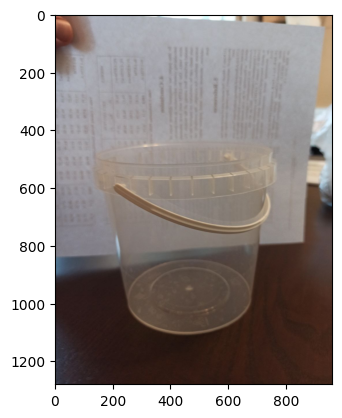

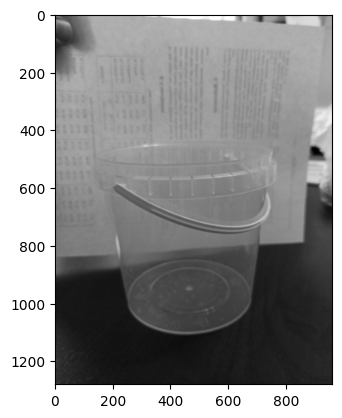

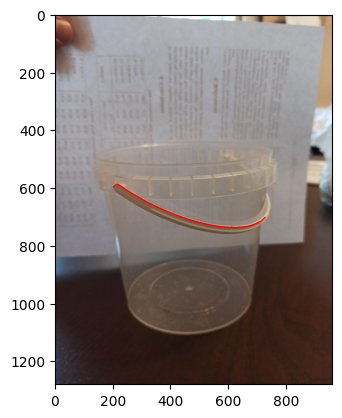

In [2]:
def handle_predict_upper(name):
    image = cv2.imread(name)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Применение фильтра Гаусса для уменьшения шумов
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    plt.imshow(blur, cmap='gray')
    plt.show()
    # Детектор границ Кенни
    canny = cv2.Canny(blur, 50, 150)

    # Поиск контуров на изображении
    contours, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    x, y, w, h = 0, 0, image.shape[1], image.shape[0] // 2

    # Отбор контуров в заданной области
    selected_contours = []
    for contour in contours:
        x1, y1, w1, h1 = cv2.boundingRect(contour)
        if x <= x1 <= x + w and y <= y1 <= y + h:
            selected_contours.append(contour)

    # Определение наиболее вероятного контура для ручки
    max_contour = max(selected_contours, key=cv2.contourArea)

    # Отрисовка контура
    cv2.drawContours(image, [max_contour], -1, (0, 0, 255), 3)

    # # Отображение результата
    # cv2.imshow("Result", image)
    # cv2.waitKey(0)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

for f in os.listdir('buckets/'):
    print("-"*20)
    print(f)
    print("-"*20)
    handle_predict_upper('buckets/'+f)
    break

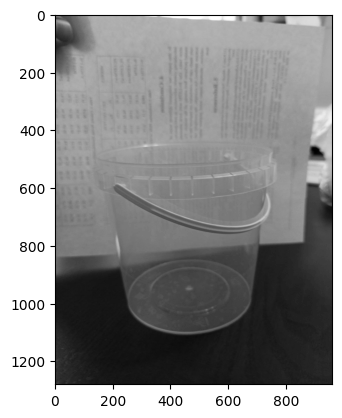

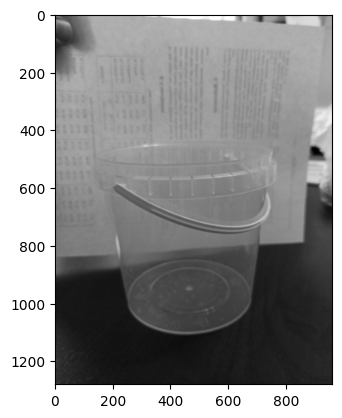

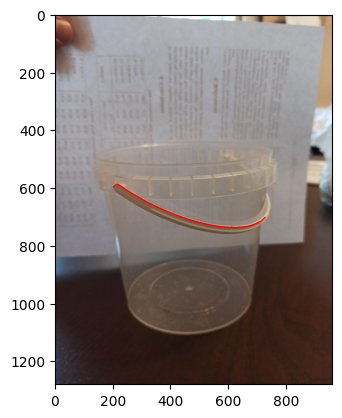

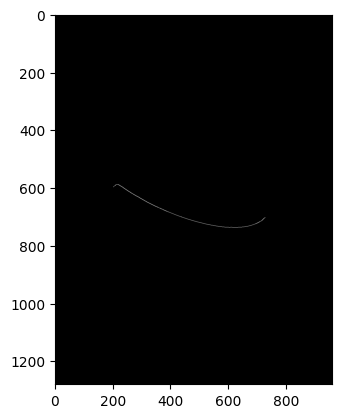

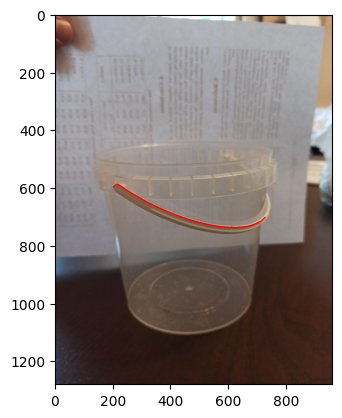

In [9]:
# Загрузка изображения
image = cv2.imread("bucket.jpg")

# Конвертирование в оттенки серого
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.show()
# Применение фильтра Гаусса для уменьшения шумов
blur = cv2.GaussianBlur(gray, (5,5), 0)
plt.imshow(blur, cmap='gray')
plt.show()
# # Применение адаптивного порогового преобразования для выделения ведра
# thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
# plt.imshow(thresh, cmap='gray')
# plt.show()
# Определение контуров ведра
# contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Детектор границ Кенни
canny = cv2.Canny(blur, 50, 150)
contours, _ = cv2.findContours(canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Определение наибольшего контура ведра
max_contour = max(contours, key=cv2.contourArea)

# Отрисовка контура
cv2.drawContours(image, [max_contour], -1, (0, 0, 255), 3)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

# # Создание маски изображения для выделения ведра
mask = cv2.drawContours(np.zeros_like(gray), [max_contour], 0, (255, 255, 255), -1)
plt.imshow(mask, cmap='gray')
plt.show()
# Закрашивание всех пикселей вне ведра белым цветом
mask = cv2.bitwise_not(mask)
result = cv2.bitwise_and(image, image, mask=mask)
result[mask == 0] = (255, 255, 255)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()
# # Отображение результата
# plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
# plt.show()